Project Deliverable 1 - D7 311

Checklist
1. Collect and pre-process a preliminary batch of data
2. Perform a preliminary analysis of the data
3. Answer one key question
4. Refine project scope and list of limitations with data and potential risks of achieving project goal
5. Submit a PR with the above report and modifications to original proposal



In [2]:
import pandas as pd
dfall = pd.read_csv('all_districts.csv')
df7 = pd.read_csv('district7_311.csv')

/var/folders/n6/mp6mw7cj3h35gsgqcgr72sbw0000gn/T/ipykernel_41754/3417555797.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfall = pd.read_csv('all_districts.csv')
/var/folders/n6/mp6mw7cj3h35gsgqcgr72sbw0000gn/T/ipykernel_41754/3417555797.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df7 = pd.read_csv('district7_311.csv')


In [44]:
# Brian
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

#dfall = pd.read_csv('all_districts.csv')
#df7 = pd.read_csv('district7_311.csv')

# Percentage of requests that were not closed

unfinishedAll = dfall.loc[dfall['case_status'] == 'Open']
unfinished7 = df7.loc[df7['case_status'] == 'Open']

print("Percentage of requests that were not closed in all districts outside of D7 is " + str(unfinishedAll.shape[0] / dfall.shape[0]))
print("Percentage of requests that were not closed in D7 is " + str(unfinished7.shape[0] / df7.shape[0]))

# Average Time from start to close for entire dataset of closed requests (not including D7)

def calcTime(start, end):
    date_format_str = '%Y-%m-%d %H:%M:%S'
    start = datetime.strptime(start, date_format_str)
    end =   datetime.strptime(end, date_format_str)
    diff = end-start
    diff_in_hours = diff.total_seconds() / 3600
    return diff_in_hours

closedAll = dfall.loc[dfall['case_status'] == 'Closed']

totalAll = 0
for i in range(closedAll.shape[0]):
    totalAll += calcTime(closedAll.iloc[i, 2], closedAll.iloc[i, 4])
print("Average number of hours from start to close for entire dataset of closed requests is " + str(totalAll/closedAll.shape[0]))


# Average Time from start to close for D7 of closed requests

closed7 = df7.loc[df7['case_status'] == 'Closed']

total7 = 0
for i in range(closed7.shape[0]):
    total7 += calcTime(closed7.iloc[i, 2], closed7.iloc[i, 4])
print("Average number of hours from start to close for D7 of closed requests is " + str(total7/closed7.shape[0]))

Percentage of requests that were not closed in all districts outside of D7 is 0.10664141431676306
Percentage of requests that were not closed in D7 is 0.11831628393192911
Average number of hours from start to close for entire dataset of closed requests is 276.9027821464053
Average number of hours from start to close for D7 of closed requests is 268.0899801151966


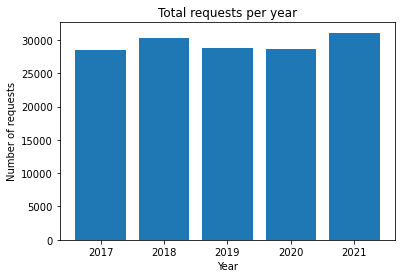

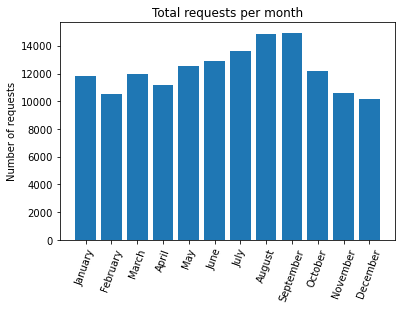

In [4]:
# Kevin
"""
How many requests in each year, with histogram
"""
import pandas as pd
import matplotlib.pyplot as plt

# Loading data of district 7 from 2017 to 2021
df_district7 = pd.read_csv('311_data/district7_311.csv')

# Extracting year and month
df_district7['year_open'] = df_district7['open_dt'].apply(lambda x: int(x.split('-')[0]))
df_district7['month_open'] = df_district7['open_dt'].apply(lambda x: int(x.split('-')[1]))

# Obtaining number of requests for D7 by year and by month
requests_per_year = []
for year in range(2017, 2022):
    requests = len(df_district7[df_district7['year_open'] == year])
    requests_per_year.append(requests)

requests_per_month = []
for month in range(1, 13):
    requests = len(df_district7[df_district7['month_open'] == month])
    requests_per_month.append(requests)

# Graphs
# Yearly
plt.bar(range(2017, 2022), requests_per_year)
plt.title('Total requests per year')
plt.xlabel('Year')
plt.ylabel('Number of requests')

plt.show()

# Monthly
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.bar(months, requests_per_month)
plt.title('Total requests per month')
plt.xticks(rotation=70)
plt.ylabel('Number of requests')

plt.show()


In [5]:
# Samantha
import pandas as pd
import numpy as np 
"""Filter dataset to only city council district 7 > csv
Filter dataset to all except district 7 > csv
share on Google drive share w/ group
Setup google slides and share w/ group"""

df_2017 = pd.read_csv('311_data/2017.csv')
df_2018 = pd.read_csv('311_data/2018.csv')
df_2019 = pd.read_csv('311_data/2019.csv')
df_2020 = pd.read_csv('311_data/2020.csv')
df_2021 = pd.read_csv('311_data/2021.csv')

df_5_year = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021])

C:\Users\ryany\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
district_7 = df_5_year.loc[df_5_year['city_council_district'] == '7']
district_7.to_csv('district7_311.csv')

In [44]:
all_other_districts = df_5_year.loc[df_5_year['city_council_district'] != '7']
all_other_districts.to_csv('all_districts.csv')

# https://drive.google.com/drive/u/2/folders/1PdVWEVEv-B9bsLuR2Ri5FSDvPsxc_avL

NameError: name 'df_5_year' is not defined

In [46]:
#Samantha 
import censusdata # pip install CensusData

#sample = censusdata.search('acs5', 2015,'concept', 'race')
#censusdata.printtable(censusdata.censustable('acs5', 2015, 'B02001')) #race
#states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)
#print(states['Massachusetts']) #summary level: 040, state:25
#place = censusdata.geographies(censusdata.censusgeo([('state', '25'), ('place', '*')]), 'acs5', 2015) #suffolk is county 25
#print(place) #Boston 07000
race_county_data = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '25'),
                                 ('county', '025'),
                                 ('tract', '*')]),
          ['B02001_001E', 'B02001_002E', 'B02001_003E',
           'B02001_004E', 'B02001_005E', 'B02001_006E', 
           'B02001_007E', 'B02001_008E', 'B02001_009E', 'B02001_010E']) #                                 
column_names = ['Total_race', 'White', 'African_American', 'American_Indian', 'Asian', 'Native Hawaiian', 'Other_race', 'Two_or_more_races', 'Two_or_more_including_other', 'Two_or_more_excluding_other'] #column3 is black or african american, 4 is American Indian and Alaska Native, 'Native Hawaiian or Pacific Islander, 
race_county_data.columns = column_names

In [47]:
#need to filter by tract?
race_county_data.head(1)


,Total_race,White,African_American,American_Indian,Asian,Native Hawaiian,Other_race,Two_or_more_races,Two_or_more_including_other,Two_or_more_excluding_other
"Census Tract 203.03, Suffolk County, Massachusetts: Summary level: 140, state:25> county:025> tract:020303",3574,2357,297,0,533,0,286,101,0,101


In [48]:
# Add a Tract column from the original index
race_county_data.reset_index(inplace=True)
race_county_data['index'] = race_county_data['index'].astype(str)
race_county_data['Tract'] = race_county_data['index'].str[-6:]
race_county_data.set_index('index', inplace=True)
race_county_data.head(1)


,Total_race,White,African_American,American_Indian,Asian,Native Hawaiian,Other_race,Two_or_more_races,Two_or_more_including_other,Two_or_more_excluding_other,Tract
index,,,,,,,,,,,
"Census Tract 203.03, Suffolk County, Massachusetts: Summary level: 140, state:25> county:025> tract:020303",3574,2357,297,0,533,0,286,101,0,101,020303


In [47]:
race_county_data.index[0]

censusgeo((('state', '25'), ('county', '025'), ('tract', '020303')), 'Census Tract 203.03, Suffolk County, Massachusetts')

https://api.census.gov/data/2020/acs/acs5/variables.html
tracks for Boston: https://bostonopendata-boston.opendata.arcgis.com/datasets/boston::census-2010-tracts/explore?location=42.335218%2C-71.020226%2C11.00&showTable=true

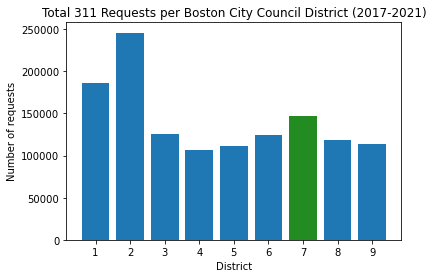

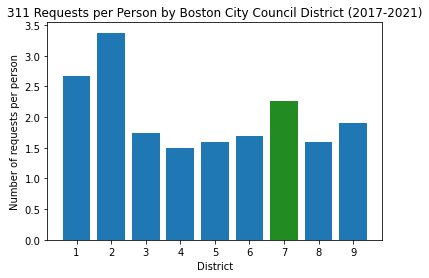

In [47]:
# Ryan

# data source http://www.bostonplans.org/research/research-publications-overview/population-demographics
# http://www.bostonplans.org/getattachment/e030be7d-3b42-400f-b834-ef55144f01e6/

#  Boston City Council Districts from the 2009-2013 American Community Survey
import pandas as pd
import matplotlib.pyplot as plt

district_names = ['D1','D2','D3','D4','D5','D6','D7','D8','D9']
districts_pop = [69756, 72867, 72359, 71554, 69454, 73647, 65183, 74469, 59536]
total_pop = 628825
names_pop_dict = dict(zip(district_names,districts_pop))

district_counts = df_5_year['city_council_district'].value_counts().sort_index()
district_counts = district_counts.tail(9) #removes na and district 0

district_counts_by_pop = district_counts/districts_pop


plt.bar(district_counts.index.values, district_counts, color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue','tab:blue','forestgreen','tab:blue','tab:blue'])
plt.title('Total 311 Requests per Boston City Council District (2017-2021)')
plt.xlabel('District')
plt.ylabel('Number of requests')
plt.show()

plt.bar(district_counts_by_pop.index.values, district_counts_by_pop, color=['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue','tab:blue','forestgreen','tab:blue','tab:blue'])
plt.title('311 Requests per Person by Boston City Council District (2017-2021)')
plt.xlabel('District')
plt.ylabel('Number of requests per person')
plt.show()